# Machine Learning Workflow
Here, we will introduce a series of machine learning workflow, assuming you address a specific task.
Let's assume that you need to estimate house prices with machine learning.
## 1. Collecting information on house prices
To predict house prices with machine learning, it is necessary to collect data related to house prices.
In the case of this task, you need to collect information on various house layouts and the prices.
For example, you may need to collect the necessary information by bworsing real estate websites.
You may also be able to use a database of house prices.
Collecting data is a very important first step when you employ machine learning.
In this lecture, we will use the Boston house price dataset, which is publicly available on the UCI machine learning repository.
Here, we use Scikit-learn to download the Boston house price dataset.
We can import the Boston house prices dataset like this and disply the data description.

In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In this dataset, we can use 14 attributes to estimate house prices.
## 2. Preprocessing the collected data
In machine learning, only numerical data can be handled, so it is necessary to represent the collected data as numerical data.
The Boston house price dataset is already numerical, but if you were analyzing customer reviews to understand their sentiment, for example, you would need to convert the text data into numerical data.
Speaking concretely, we need to represent the attributes and the house prices as matrices.
We will represent the attributes of the houses as a matrix and the house prices as a vector.
If you want to further process the data itself, you can also use a python library, pandas.

In [13]:
# Convert Boston house price dataset into pandas data.
import pandas as pd
x_pandas = pd.DataFrame(boston_data['data'])
x_pandas.columns = boston_data.feature_names
print(x_pandas.head())
print()

# Convert Boston house price dataset into a matrix.
x = boston_data['data']
y = boston_data['target']
print(x[0], y[0])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0


In pandas, data is displayed in a table format.

## 3. Constructing a predictor
After representing the data as numbers, we can use machine learning to build a predictor.
We need to consider which attributes to use for prediction, so we may need to visualize the data to select necessary attributes.
In the following figure, we plot data with the number of rooms and the house price.

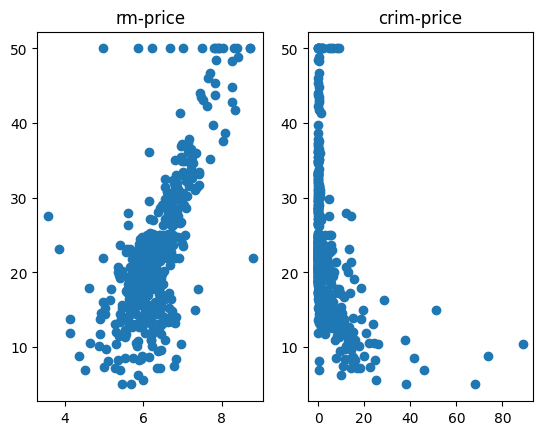

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
rm = x[:, 5]
ax1.set_title('rm-price')
ax1.scatter(rm, y)
crim = x[:, 0]
ax2.set_title('crim-price')
ax2.scatter(crim, y)

There is a positive correlation between the number of rooms and the house prices, but no correlation between the crime rate and the house prices.

In this case, we will use machine learning to construct a function that calculates the house price from all the attributes.
Especially, we limit the function to a linear function.
This is called linear regression.

Before constructing the predictor, we will split the data into training data and test data.
In this case, we randomly selected 70% of the data as training data and the remaining as test data.
After training on the training data, we predict house prices in the test data with the trained model.
Since the prediction value in this case is the house price, we will plot its relationship with the true values below.

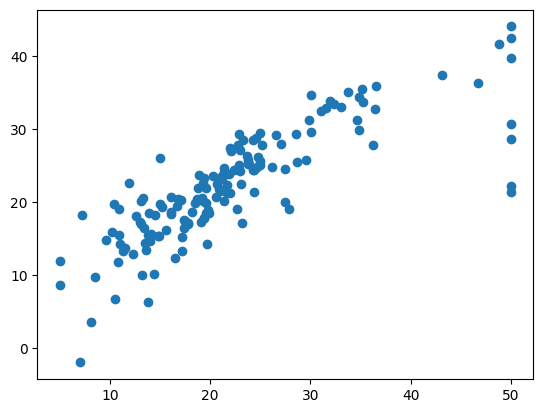

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=.7, test_size=.3)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

plt.scatter(Y_test, Y_pred)

There is a strong positive correlation between the predicted values and the true values in the plot.
It means that predictions are appropriate.

Next, based on the house price prediction, let's consider the case where we only purchase properties priced at $30,000 or more.
In this case, the final prediction becomes a binary classification of whether to buy or not to buy.
We use Perceptron in Scikit-learn to construct the linear classifier using the converted data.

In [42]:
print('Original Data')
print(y)

# Convert numerical data to binary data
binary_y = [1 if p > 30 else 0 for p in y]
print('Converted Data')
print(binary_y)

from sklearn.linear_model import Perceptron
lc = Perceptron()
X_train, X_test, Y_train, Y_test = train_test_split(x, binary_y, train_size=.7, test_size=.3)
lc.fit(X_train, Y_train)
Y_binary_pred = lc.predict(X_test)
print('House price')
print(Y_test)
print('Predicted house price')
print(Y_binary_pred)

Original Data
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29

We need to examine whether the predictions match the actual values.

## 4. Evaluating the predictions
When using machine learning, it is necessary to evaluate how accurate the predictions are.
In linear regression, since the predicted values are real numbers, we evaluate the difference between the predicted values and the true values.
Methods for evaluating the difference are the mean squared error (MSE) and the mean absolute error (MAE).
$$ {\rm MSE} = \frac{1}{n}\sum_{i=1}^n \left( t - \hat{t} \right)^2$$
$$ {\rm MAE} = \frac{1}{n}\sum_{i=1}^n \left| t - \hat{t} \right| $$
$t$ denotes the true value and $\hat{t}$ is the predicted value.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE:', mean_squared_error(Y_test, Y_pred))
print('MAD:', mean_absolute_error(Y_test, Y_pred))

MSE: 547.1474908504379
MAD: 22.15005437184962


A smaller MSE or MAE means more accurate predictions.

On the other hand, in classification, the predicted values are {1, 0}, so it is not appropriate to calculate the difference in the same way as in regression.
Generally, we evaluate the proportion of predictions that are correct.
In this case, we will calculate the precision.

In [58]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(Y_test, Y_binary_pred))

0.8421052631578947


Larger accuracy means more precise and its upper limit is 1.0.

# Conclusions
We illustrated a workflow using machine learning, assuming a hypothetical task
Actually, based on the results, we discuss the obtained classifier and reconstruct the  other classifiers using other machine learning methods.

In this lecture, we plan to explain not only how to use machine learning libraries but also the theory behind it.